# Installation

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
!conda install cuda-toolkit cuda-nvcc -y -q --copy

Retrieving notices: ...working... done
done
Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cuda-nvcc
    - cuda-toolkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cuda-command-line-tools-12.4.0|                0           2 KB  nvidia
    cuda-compiler-12.4.0       |                0           2 KB  nvidia
    cuda-cudart-static-12.4.99 |                0         1.1 MB  nvidia
    cuda-cuobjdump-12.4.99     |                0         301 KB  nvidia
    cuda-cupti-12.4.99         |                0        16.4 MB  nvidia
    cuda-cupti-static-12.4.99  |                0        11.3 MB  nvidia
    cuda-cuxxfilt-12.4.99      |                0         285 KB  nvidia
    cuda-documentation-12.4.99 |                0          89 KB  nvidia
    cuda-driver-dev-12.4.99    |                0          18 KB  

In [2]:
# !which nvcc
!ls "/opt/conda/bin" | grep cuda

cuda-gdb
cuda-gdbserver
cudafe++
dask-cuda-config
dask-cuda-worker


In [3]:
!CUDACXX="/opt/conda/bin/nvcc" FORCE_CMAKE=1 CMAKE_ARGS="-DLLAMA_CUBLAS=on -DCMAKE_CUDA_ARCHITECTURES=all-major" pip install llama-cpp-python --no-cache-dir --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.9/36.9 MB 24.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 228.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 182.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 166.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.57-cp310-cp310-manylinux_2_31_x86_64.whl size=22715027 sha256=78cf4bed92740cab156d006e5e0109358811d95f1c5dba335d7f165a171d8552
  Stored in directory: /tmp/pip-ephem-wheel-cache-ymgqd78s/wheels/7e/c0/00/e98d6e198f941c623da37b3f674354cbdccfcfb2cb9cf1133d
Successfully built llama-cpp-python
  Attempting uninstall: typing-extensions
  

In [4]:
!pip install -q -U langchain langchain-text-splitters

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
keras-cv 0.8.2 requires keras-core, which is not installed.
keras-nlp 0.8.2 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
cudf

In [5]:
!pip install -q -U huggingface_hub 

In [6]:
!pip install -q PyPDF2
!pip install -q nltk textstat

# Model and Chain initialization 

In [7]:
import torch
from langchain_community.llms import LlamaCpp
from huggingface_hub import hf_hub_download
from huggingface_hub import login

login(token="YOUR_HUGGINGFACE_ACCESS_TOKEN")

Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [8]:
# #clean gpu memory code
# # !pip install numba
# from numba import cuda
# llm1 = None
# llm2 = None
# device = cuda.get_current_device()
# device.reset()

In [9]:
model = "Deci/DeciLM-7B-instruct-GGUF"
model_file = "decilm-7b-uniform-gqa-q8_0.gguf"

model1= hf_hub_download(repo_id=model, filename=model_file)

decilm-7b-uniform-gqa-q8_0.gguf:   0%|          | 0.00/7.55G [00:00<?, ?B/s]

In [10]:
gpu_layers = 28 if torch.cuda.is_available() else 0

llm1 = LlamaCpp(model_path=model1,
                temperature=0,
                n_gpu_layers=gpu_layers,
                use_mlock=False,
                n_ctx=2048,
                verbose=False,
                max_tokens=1300)
llm1

ggml_init_cublas: GGML_CUDA_FORCE_MMQ:   no
ggml_init_cublas: CUDA_USE_TENSOR_CORES: yes
ggml_init_cublas: found 2 CUDA devices:
  Device 0: Tesla T4, compute capability 7.5, VMM: yes
  Device 1: Tesla T4, compute capability 7.5, VMM: yes


LlamaCpp(verbose=False, client=<llama_cpp.llama.Llama object at 0x7dd12e7625c0>, model_path='/root/.cache/huggingface/hub/models--Deci--DeciLM-7B-instruct-GGUF/snapshots/9d724a12bd36e8a884f147751ea207ed56a98035/decilm-7b-uniform-gqa-q8_0.gguf', n_ctx=2048, n_gpu_layers=28, max_tokens=1300, temperature=0.0)

In [11]:
model = "google/gemma-2b-it-GGUF"
model_file = "gemma-2b-it.gguf"

model2= hf_hub_download(repo_id=model, filename=model_file)

gemma-2b-it.gguf:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

In [12]:
gpu_layers = 18 if torch.cuda.is_available() else 0

llm2 = LlamaCpp(model_path=model2,
                temperature=0,
                n_gpu_layers=gpu_layers,
                use_mlock=False,
                n_ctx=2500,
                verbose=False,
                max_tokens=1500)
llm2

LlamaCpp(verbose=False, client=<llama_cpp.llama.Llama object at 0x7dd088f0f790>, model_path='/root/.cache/huggingface/hub/models--google--gemma-2b-it-GGUF/snapshots/ac195f695407647c38c63d5739b0f9e1a673c137/gemma-2b-it.gguf', n_ctx=2500, n_gpu_layers=18, max_tokens=1500, temperature=0.0)

In [13]:
print(llm2.invoke("""Give few insightful questions based on the text: "The next wave of computing devices includes wearable gadgets such as smart watches, lenses, headbands, and headphones. Smart appliances are also becoming a part of the Internet of Things (IoT) by leveraging the power of Artificial Intelligence (AI).
1.3 computer memory
A computer system needs memory to store data and instructions for processing. When we talk about the 'memory' of a computer system, we usually refer to the main or primary memory. The secondary memory (also called storage device) is used to store data, instructions, and results permanently for future use.
1.3.1 Units of Memory
A computer system uses binary numbers to store and process data. The basic units of memory are bits, which are grouped together to form words. A 4-bit word is called a nibble. Examples of nibbles include 1001, 1010, 0010, etc. A two nibble word, i.e., an eight-bit word, is called a byte. For example, 01000110, 01111100, 10000001, etc.
Like any other standard unit, bytes are grouped together to make bigger chunks or units of memory. Table 1.1 shows different measurement units for digital data stored in storage devices."
Include a blend of factual inquiries and deeper analytical probes to uncover comprehensive insights.
Formulate questions that explore diverse angles and subtleties present in the text.
Each question should have a verifiable answer within the text to ensure accuracy.
Only Questions:"""))



1. What is the difference between main memory and secondary memory?
2. What is the role of AI in smart appliances?
3. How do bits and bytes contribute to the storage and processing of data?
4. What is the significance of memory in the context of wearable gadgets?
5. What is the impact of AI on the next wave of computing devices?


In [14]:
print(llm2.invoke("""Context: "The next wave of computing devices includes 
the wearable gadgets, such as smart watch, lenses, 
headbands, headphones, etc. Further, smart appliances 
are becoming a part of the Internet of Things (IoT), by 
leveraging the power of Artificial Intelligence (AI).
 1.3 computer memory
 A computer system needs memory to store the data and 
instructions for processing. Whenever we talk about the 
‘memory’ of a computer system, we usually talk about the 
main or primary memory. The secondary memory (also 
called storage device) is used to store data, instructions 
and results permanently for future use.
 1.3.1 Units of Memory
 A computer system uses binary numbers to store and 
process data. The binary digits 0 and 1, which are the 
basic units of memory, are called bits. Further, these 
bits are grouped together to form words. A 4-bit word 
is called a Nibble. Examples of nibble are 1001, 1010, 
0010, etc. A two nibble word, i.e., 8-bit word is called a 
byte, for example, 01000110, 01111100, 10000001, etc.
 Like any other standard unit, bytes are grouped 
together to make bigger chunks or units of memory. 
Table 1.1 shows different measurement units for digital 
data stored in storage devices."
Answer the following questions concisely from the context.
Provide clear answers in one line that directly address the questions.
Do not introduce new information or go beyond the provided context.
Do not answer if the context is insufficient.
Questions:"1. What is the difference between main memory and secondary memory?
2. What is the role of AI in smart appliances?
3. How do bits and bytes contribute to the storage and processing of data?
4. What is the significance of memory in the context of wearable gadgets?
5. What is the impact of AI on the next wave of computing devices?"
Answers:"""))



1. Main memory is the primary memory used for short-term storage and processing of data, while secondary memory is used for long-term storage and retrieval of data.


2. AI plays a crucial role in smart appliances by enabling them to learn, adapt, and make informed decisions based on real-time data and context.


3. Bits and bytes are fundamental units of memory that are grouped together to form words. A 4-bit word is called a byte, and a 2-byte word is called a nibble.


4. The wearable gadgets require a significant amount of memory to store and process the vast amount of data generated and collected during their operation.


5. AI is expected to play a transformative role in the next wave of computing devices by enabling devices to learn, adapt, and make autonomous decisions, further enhancing their capabilities and functionalities.


In [15]:
print(llm2.invoke("""Only give few meaningful questions based on the text: "A computer system uses physical wires called buses for data transfer between different components.
For example, a bus is used for data transfer between a USB port and hard disk or between a hard disk and main memory. Buses are classified into three types: (i) Data bus for transferring data between different components,
(ii) Address bus for transferring addresses between the CPU and main memory, and (iii) Control bus for communicating control signals between different components of a computer. All these three buses collectively make up the system bus, as shown in Figure 1.8.
As the CPU interacts directly with main memory, any data entered from an input device or the data to be accessed from a hard disk needs to be placed in the main memory for further processing. The data is then transferred between the CPU and main memory using the bus."
Include a blend of factual inquiries and deeper analytical probes to uncover comprehensive insights.
Formulate questions that explore diverse angles and subtleties present in the text.
Each question should have a verifiable answer within the text to ensure accuracy.
Only Questions:"""))



1. What is the function of the address bus in the computer system?


2. How does the data transfer between the CPU and main memory occur?


3. What is the difference between a data bus and an address bus?


4. What is the role of the control bus in the computer system?


5. What is the significance of the system bus in the overall functioning of the computer system?


In [16]:
print(llm2.invoke("""Context: "A computer system uses physical wires called buses for data transfer between different components.
For example, a bus is used for data transfer between a USB port and hard disk or between a hard disk and main memory. Buses are classified into three types: (i) Data bus for transferring data between different components,
(ii) Address bus for transferring addresses between the CPU and main memory, and (iii) Control bus for communicating control signals between different components of a computer. All these three buses collectively make up the system bus, as shown in Figure 1.8.
As the CPU interacts directly with main memory, any data entered from an input device or the data to be accessed from a hard disk needs to be placed in the main memory for further processing.
The data is then transferred between the CPU and main memory using the bus."
Answer the following questions concisely from the context.
Provide clear answers in one line that directly address the questions.
Do not introduce new information or go beyond the provided context.
Do not answer if the context is insufficient.
Questions: "1. What is the function of the address bus in the computer system?
2. How does the data transfer between the CPU and main memory occur?
3. What is the difference between a data bus and an address bus?
4. What is the role of the control bus in the computer system?
5. What is the significance of the system bus in the overall architecture of a computer system?"
Answers:"""))



1. The address bus is responsible for transferring addresses between the CPU and main memory, allowing the CPU to access and manipulate data stored in memory locations.


2. The data transfer between the CPU and main memory occurs through the bus by loading the required data from the input device or hard disk into the memory location specified by the address received from the address bus.


3. A data bus is responsible for transferring data between different components, while the address bus is responsible for transferring addresses between the CPU and main memory.


4. The control bus facilitates communication between different components of the computer, enabling them to exchange control signals and synchronize their activities.


5. The system bus serves as the central communication hub in the computer system, connecting all the components and facilitating their interactions to ensure seamless data transfer and system operation.


# Chunks Preparation

In [99]:
file_path = r"/kaggle/input/ncert-class-11-cs/kecs101.pdf"

In [100]:
from PyPDF2 import PdfReader
reader = PdfReader(file_path)
print(f"Number of pages: {len(reader.pages)}")
print(f"Book Metadata: {reader.metadata}")

book = ""
for page in reader.pages:
  book += page.extract_text()

Number of pages: 26
Book Metadata: {'/CreationDate': "D:20190408113614+05'30'", '/Creator': 'Adobe InDesign CS6 (Windows)', '/ModDate': "D:20230410162727+05'30'", '/Producer': 'Adobe PDF Library 10.0.1', '/Trapped': '/False'}


In [101]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

character_splitter = RecursiveCharacterTextSplitter(chunk_size=1200,chunk_overlap=50)

docs = character_splitter.create_documents([book])

len(docs)

51

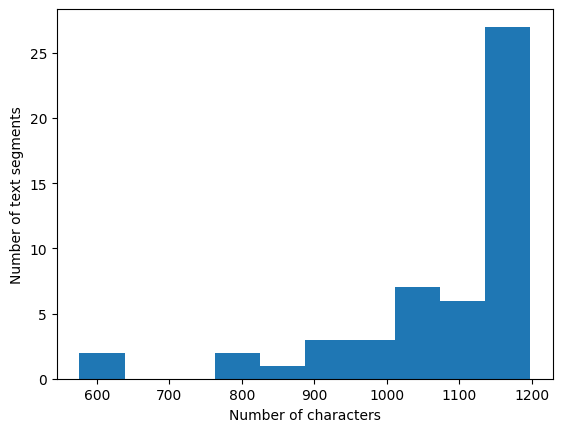

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

content_list = [doc.page_content for doc in docs]

df = pd.DataFrame(content_list, columns=['page_content'])

plt.hist(df['page_content'].str.len())
plt.xlabel('Number of characters')
plt.ylabel('Number of text segments')
plt.show()

# Prompt Engineering

In [103]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
parser = StrOutputParser()

In [104]:
s_prompt_template ="""You have been tasked with processing text segments extracted from PDF books.

Your goal is to transform each text segment to ensure the resulting text is clear, informative, and retains all essential details from the original.
The processed text should not be more than 60-70% of the original text's length while maintaining readability and natural flow. 

It's crucial that the processed text neither excludes vital information nor adds new information not present in the original text.
Your task is to process the following text segment: {context}

Processed Text:
"""

q_prompt_template = """Only give few meaningful questions based on the text: {context}

Include a blend of factual inquiries and deeper analytical probes to uncover comprehensive insights.
Formulate questions that explore diverse angles and subtleties present in the text.
Each question should have a verifiable answer within the text to ensure accuracy.

Only Questions:"""

a_prompt_template = """Context: {summary}

Answer the questions concisely from the context.
Provide clear answers that directly address the questions.
Do not introduce new information or go beyond the provided context.
Do not answer if the context is insufficient.

Questions: {questions}

Only Answers:"""

s_prompt = PromptTemplate(template=s_prompt_template, input_variables=["context"])
q_prompt = PromptTemplate(template=q_prompt_template, input_variables=["context"])
a_prompt = PromptTemplate(template=a_prompt_template, input_variables=["summary", "questions"])

s_chain = s_prompt|llm1|parser
q_chain = q_prompt|llm2|parser
a_chain = a_prompt|llm2|parser

# Run chains on 1 chunk

In [105]:
content=docs[24].page_content
len(content)

1193

In [106]:
print(content)

sources in the digital form. This capturing may vary from simple instruments like keyboard, barcode readers used at shopping outlets (Figure 1.12), comments or posts over social media, remote sensors on an earth orbiting satellite, 
etc. Sometimes, heterogeneity among 
data sources makes data capturing a complex task.
(B) Data Storage 
It is the process of storing 
the captured data for 
processing later. Now-a-days data is being produced at 
a very high rate, and therefore data storage has become a challenging task. However, the decrease in the cost of digital storage devices has helped in simplifying this task. There are numerous digital storage devices available in the market like as shown in Figure 1.7.
Data keeps on increasing with time. Hence, the 
storage devices also require to be upgraded periodically. 
In large organisations, computers with larger and faster storage called data servers are deployed to store vast amount of data. Such dedicated computers help in processing data

In [107]:
summary = s_chain.invoke({"context":content})
print(len(summary))
print(summary)

1047
Data sources in digital form can vary from simple instruments like keyboards or barcode readers used at shopping outlets (Figure 1.12), comments or posts over social media, remote sensors on an earth orbiting satellite, etc. Sometimes, heterogeneity among data sources makes data capturing a complex task. Data storage has become a challenging task due to the high rate of data production nowadays. However, the decrease in the cost of digital storage devices has helped in simplifying this task. There are numerous digital storage devices available in the market like as shown in Figure 1.7. Data keeps on increasing with time. Hence, the storage devices also require to be upgraded periodically. In large organisations, computers with larger and faster storage called data servers are deployed to store vast amount of data. Such dedicated computers help in processing data efficiently. However, the cost (both hardware and software) of setting up a data server as well as its maintenance is hi

In [108]:
questions = q_chain.invoke({"context":summary})
print(questions)



1. What types of data sources are mentioned in the text?


2. How does the cost of digital storage devices impact data capturing?


3. What is the role of data servers in large organisations?


4. What are the challenges associated with data storage in large organisations?


5. How does the decrease in the cost of digital storage devices simplify data capturing?


In [109]:
answers = a_chain.invoke({"summary":summary,"questions":questions})
print(answers)



1. The types of data sources mentioned in the text are keyboards, barcode readers, social media comments, remote sensors, and data servers.


2. The cost of digital storage devices significantly impacts data capturing by increasing the complexity of data capture.


3. The role of data servers in large organisations is to store vast amounts of data efficiently.


4. The challenges associated with data storage in large organisations include the high cost of setting up and maintaining data servers.


5. The decrease in the cost of digital storage devices simplifies data capturing by reducing the complexity of data capture.


In [110]:
questions_str = questions
answers_str = answers

question_list = re.findall(r'\d+\..+?(?=\d+\.|\Z)', questions, flags=re.DOTALL)
answer_list = re.findall(r'\d+\..+?(?=\d+\.|\Z)', answers, flags=re.DOTALL)

if len(question_list) > len(answer_list):
    answer_list.extend([''] * (len(question_list) - len(answer_list)))

qa_pairs = [{"summary": summary, "question": q, "answer": a} for q, a in zip(question_list, answer_list)]
qa_pairs

[{'summary': 'Data sources in digital form can vary from simple instruments like keyboards or barcode readers used at shopping outlets (Figure 1.12), comments or posts over social media, remote sensors on an earth orbiting satellite, etc. Sometimes, heterogeneity among data sources makes data capturing a complex task. Data storage has become a challenging task due to the high rate of data production nowadays. However, the decrease in the cost of digital storage devices has helped in simplifying this task. There are numerous digital storage devices available in the market like as shown in Figure 1.7. Data keeps on increasing with time. Hence, the storage devices also require to be upgraded periodically. In large organisations, computers with larger and faster storage called data servers are deployed to store vast amount of data. Such dedicated computers help in processing data efficiently. However, the cost (both hardware and software) of setting up a data server as well as its maintena

# Call Pipeline on loop

In [111]:
sum = 0
for i in range(0,len(docs)):
    content = docs[i].page_content
    sum += len(content)
print(f"Mean Chunk size: {round(sum/len(docs),2)}")

Mean Chunk size: 1078.18


In [112]:
import pandas as pd
import time
import re 

def process_chunks(start_idx, end_idx):
    final_df_chunk = []

    for i in range(start_idx, end_idx):
        content = docs[i].page_content
        print(f"Chunk Number: {i}")
        print(f"Chunk Length in characters: {len(content)}")

        start = time.time()
        summary = s_chain.invoke({"context": content})
        chain1_time = time.time()
        print(f"Summary Length in characters: {len(summary)}")
        print(f"Summary Generation Time: {(chain1_time - start) / 60}")

        questions = q_chain.invoke({"context": summary})
        chain2_time = time.time()
        print(f"Questions Generation Time: {(chain2_time - chain1_time) / 60}")

        answers = a_chain.invoke({"summary": summary, "questions": questions})
        chain3_time = time.time()
        print(f"Answers Generation Time: {(chain3_time - chain2_time) / 60}")

        # Example variables
        questions_str = questions
        answers_str = answers

        question_list = re.findall(r'\d+\..+?(?=\d+\.|\Z)', questions, flags=re.DOTALL)
        answer_list = re.findall(r'\d+\..+?(?=\d+\.|\Z)', answers, flags=re.DOTALL)
        
        if len(question_list) > len(answer_list):
            answer_list.extend([''] * (len(question_list) - len(answer_list)))

        qa_pairs = [{"summary": summary, "question": q, "answer": a} for q, a in zip(question_list, answer_list)]

        df = pd.DataFrame(qa_pairs)
        final_df_chunk.append(df)

        print("___________________________________________________")

    return final_df_chunk

In [113]:
last_index = len(docs)
segment = last_index//3
segment

17

In [114]:
import time 

begin = time.time()
last_index = len(docs)
# segment = last_index//3 # each segment will be 33% of total number of chunks

first = process_chunks(0,last_index)
# second = process_chunks(segment,2*segment)
final_df = pd.concat([*first], ignore_index=True) #, *second

total_time = round((time.time() - begin) / 60, 2)
print(f"Total Time Taken: {total_time} minutes")

Chunk Number: 0
Chunk Length in characters: 1188
Summary Length in characters: 998
Summary Generation Time: 0.6567638913790385
Questions Generation Time: 0.7762128472328186
Answers Generation Time: 1.4199698408444723
___________________________________________________
Chunk Number: 1
Chunk Length in characters: 1184
Summary Length in characters: 565
Summary Generation Time: 0.5247068087259928
Questions Generation Time: 0.554528550306956
Answers Generation Time: 0.9398826638857524
___________________________________________________
Chunk Number: 2
Chunk Length in characters: 1026
Summary Length in characters: 1463
Summary Generation Time: 0.8196044484774272
Questions Generation Time: 0.5371760368347168
Answers Generation Time: 0.7930182576179504
___________________________________________________
Chunk Number: 3
Chunk Length in characters: 1026
Summary Length in characters: 845
Summary Generation Time: 0.5897996584574382
Questions Generation Time: 0.46490339438120526
Answers Generation 

In [115]:
file_path = "ncert_cs.csv"
final_df.to_csv(file_path, index=False)
final_df

,summary,question,answer
0,A computer system is an electronic device that...,1. What is the function of the central process...,1. The central processing unit (CPU) is the el...
1,A computer system is an electronic device that...,2. What are the components of a computer syste...,2. The components of a computer system include...
2,A computer system is an electronic device that...,3. How does the central processing unit (CPU) ...,3. The central processing unit (CPU) achieves ...
3,A computer system is an electronic device that...,4. What is the significance of the central pro...,4. The central processing unit (CPU) is the mo...
4,A computer system is an electronic device that...,5. How does the design of a computer system im...,5. The design of a computer system significant...
...,...,...,...
292,What is the clock speed of your microprocessor...,1. What is the clock speed of your microproces...,1. The context does not provide information ab...
293,What is the clock speed of your microprocessor...,2. Which device in your school or home has a m...,2. The context does not provide information ab...
294,What is the clock speed of your microprocessor...,3. What is the size of RAM and HDD of a comput...,3. The context does not provide information ab...
295,What is the clock speed of your microprocessor...,4. List all secondary storage devices availabl...,4. The context does not provide information ab...


# Analysis


In [116]:
import nltk
import textstat
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

nltk.download('punkt')
nltk.download('stopwords')

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
import pandas as pd
from textstat import flesch_kincaid_grade

def analyze_df(df):
    # Create a new DataFrame for analysis
    analysis_df = pd.DataFrame()

    # Calculate word count for each column
    for col in ['summary', 'question', 'answer']:
        analysis_df[col + '_word_count'] = df[col].apply(lambda x: len(str(x).split()))

    # Calculate token count for each column
    for col in ['summary', 'question', 'answer']:
        analysis_df[col + '_token_count'] = df[col].apply(lambda x: len(str(x)))

    # Calculate Flesch-Kincaid grade level for each column
    for col in ['summary', 'question', 'answer']:
        analysis_df[col + '_flesch_kincaid_grade'] = df[col].apply(lambda x: flesch_kincaid_grade(str(x)))

    return analysis_df

# Call the function to analyze final_df and store the result in analysis_df
analysis_df = analyze_df(final_df)

# Print the first few rows of analysis_df
analysis_df.head()

,summary_word_count,question_word_count,answer_word_count,summary_token_count,question_token_count,answer_token_count,summary_flesch_kincaid_grade,question_flesch_kincaid_grade,answer_flesch_kincaid_grade
0,160,15,27,998,83,164,12.3,8.0,13.8
1,160,17,19,998,91,135,12.3,8.7,13.1
2,160,14,25,998,89,192,12.3,8.8,18.9
3,160,15,30,998,87,188,12.3,9.1,16.2
4,160,14,34,998,86,260,12.3,11.1,18.2


In [118]:
file_path = "ncert_cs_analysis.csv"
analysis_df.to_csv(file_path, index=False)

file_path = "ncert_cs_analysis_short.csv"
analysis = analysis_df.describe(include="all")
analysis.to_csv(file_path, index=False)

analysis

,summary_word_count,question_word_count,answer_word_count,summary_token_count,question_token_count,answer_token_count,summary_flesch_kincaid_grade,question_flesch_kincaid_grade,answer_flesch_kincaid_grade
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,132.131313,12.585859,23.878788,840.552189,75.242424,156.000000,11.891582,8.369024,13.712121
std,66.579659,3.004535,9.015309,401.079824,19.742476,59.440067,2.705893,3.050861,4.585780
min,44.000000,1.000000,1.000000,296.000000,5.000000,5.000000,4.900000,-3.500000,-3.500000
25%,89.000000,10.000000,19.000000,565.000000,61.000000,124.000000,10.000000,6.400000,11.500000
50%,110.000000,12.000000,23.000000,739.000000,73.000000,149.000000,11.700000,8.300000,13.900000
75%,164.000000,14.000000,28.000000,1025.000000,87.000000,186.000000,13.900000,10.300000,16.600000
max,455.000000,23.000000,66.000000,2783.000000,134.000000,449.000000,20.100000,16.600000,24.000000
